# Object Detection with YOLOv11 and Roboflow Dataset

This notebook demonstrates the process of training a YOLO (You Only Look Once) object detection model using a dataset from Roboflow, and then using the trained model to detect objects in new images. The steps include setting up the dataset, training the model, and performing inference on test images.

In [1]:
from ultralytics import YOLO
import os
import yaml
from IPython.display import Image
import json
import cv2
from pathlib import Path

## 1. Setting Up the Dataset

First, we load the dataset configuration from a data.yaml file. This file contains paths to the training, validation, and test datasets.
We update the paths in the data.yaml file to point to the correct directories for training, validation, and testing.

In [2]:
project_dir = os.path.dirname(os.getcwd())
dataset_location = os.path.join(project_dir, 'data', 'roboflow_dataset_yolo_v11')
data_yaml_location = os.path.join(dataset_location, 'data.yaml')

In [3]:
with open (data_yaml_location, 'r') as file:
    data = yaml.safe_load(file)

data['train'] = f'{dataset_location}/train/images'
data['val'] = f'{dataset_location}/valid/images'
data['test'] = f'{dataset_location}/test/images'

with open(data_yaml_location, 'w') as file:
    yaml.dump(data, file)

## 2. Training the YOLO Model

We load a pretrained YOLO model using the YOLO class from the Ultralytics library.

We specify a directory to save the training logs and results.

In [4]:
# Load a pretrained YOLO detection model
model = YOLO('yolo11s.pt')
training_name = 'experiment2'

# Set the logging directory
log_dir = f'{dataset_location}/logs'  # specify your directory here

We train the model using the updated dataset configuration. The training results are saved in the specified directory.

In [5]:
# Train the model and log results to the specified directory
model.train(
    data=data_yaml_location,
    epochs=10,
    project=log_dir,  # directory to save results
    name=training_name # subdirectory for this specific run
)

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100 80GB PCIe, 81051MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/logs, name=experiment22, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, clas

100%|██████████| 755k/755k [00:02<00:00, 260kB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

 23        [16, 19, 22]  1    819795  ultralytics.nn.modules.head.Detect           [1, [128, 256, 512]]          
YOLO11s summary: 319 layers, 9,428,179 parameters, 9,428,163 gradients, 21.5 GFLOPs

Transferred 493/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/train/labels... 18528 images, 18 backgrounds, 0 corrupt: 100%|██████████| 18528/18528 [00:15<00:00, 1161.91it/s]


train: New cache created: /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/train/labels.cache


val: Scanning /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/valid/labels... 1765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1765/1765 [00:01<00:00, 1550.29it/s]


val: New cache created: /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/valid/labels.cache
Plotting labels to /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/logs/experiment22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/logs/experiment22
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1158 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 26.00 MiB. GPU 0 has a total capacity of 79.15 GiB of which 14.12 MiB is free. Process 1854142 has 77.61 GiB memory in use. Process 2329301 has 1.50 GiB memory in use. Of the allocated memory 942.37 MiB is allocated by PyTorch, and 53.63 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

## 3. Viewing Training Results

We visualize the training results by displaying the results.png and val_batch0_labels.jpg images.

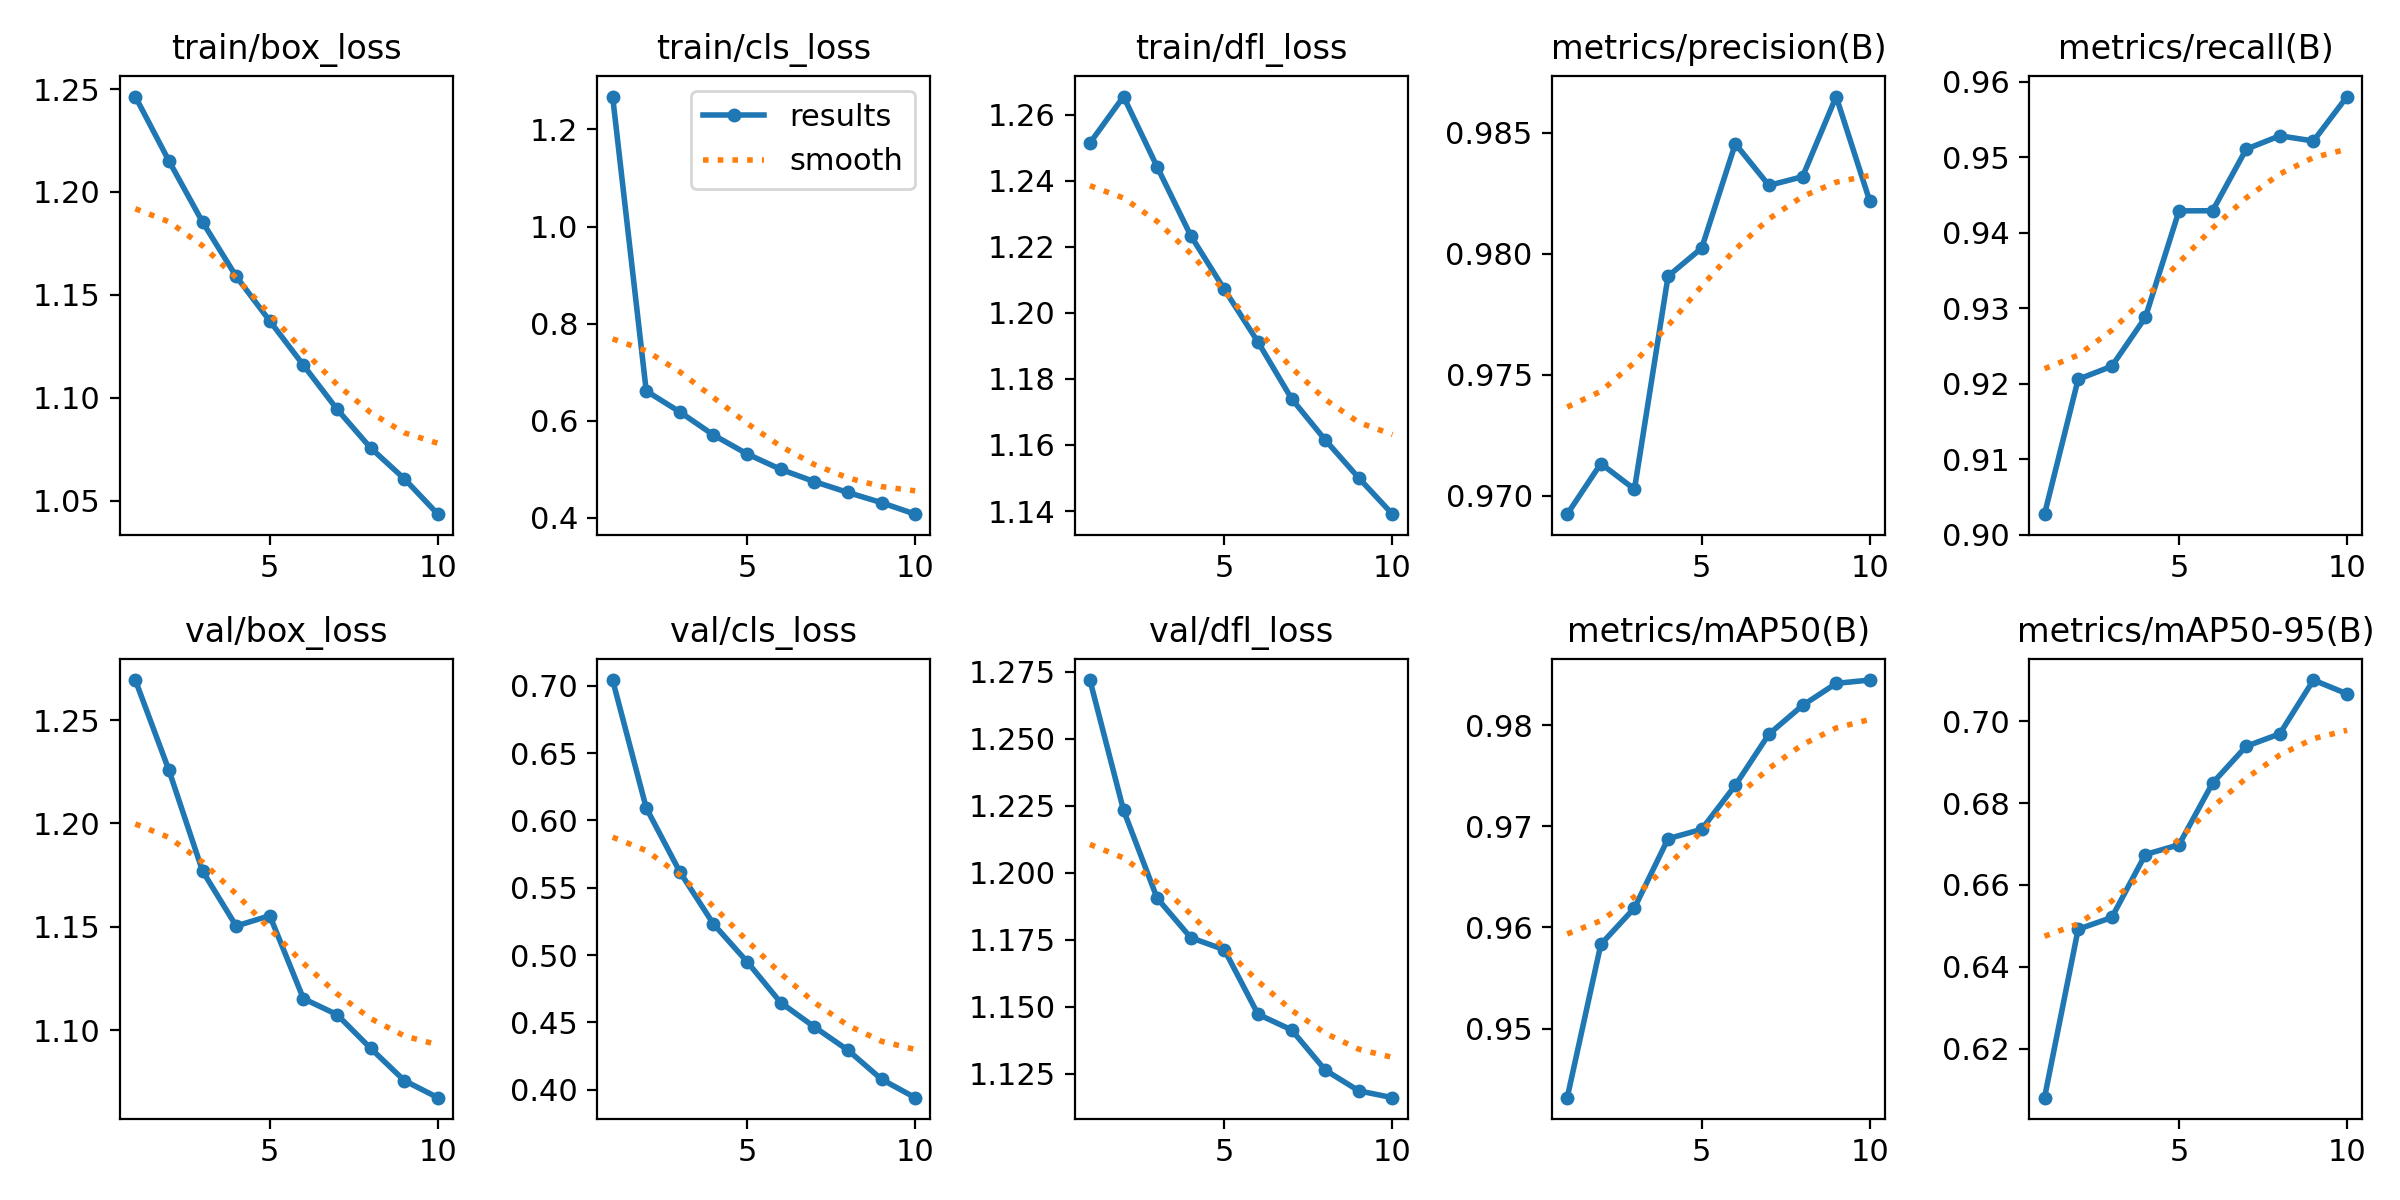

In [5]:
Image(filename=f'{log_dir}/{training_name}/results.png', width=1000)  # view results.png

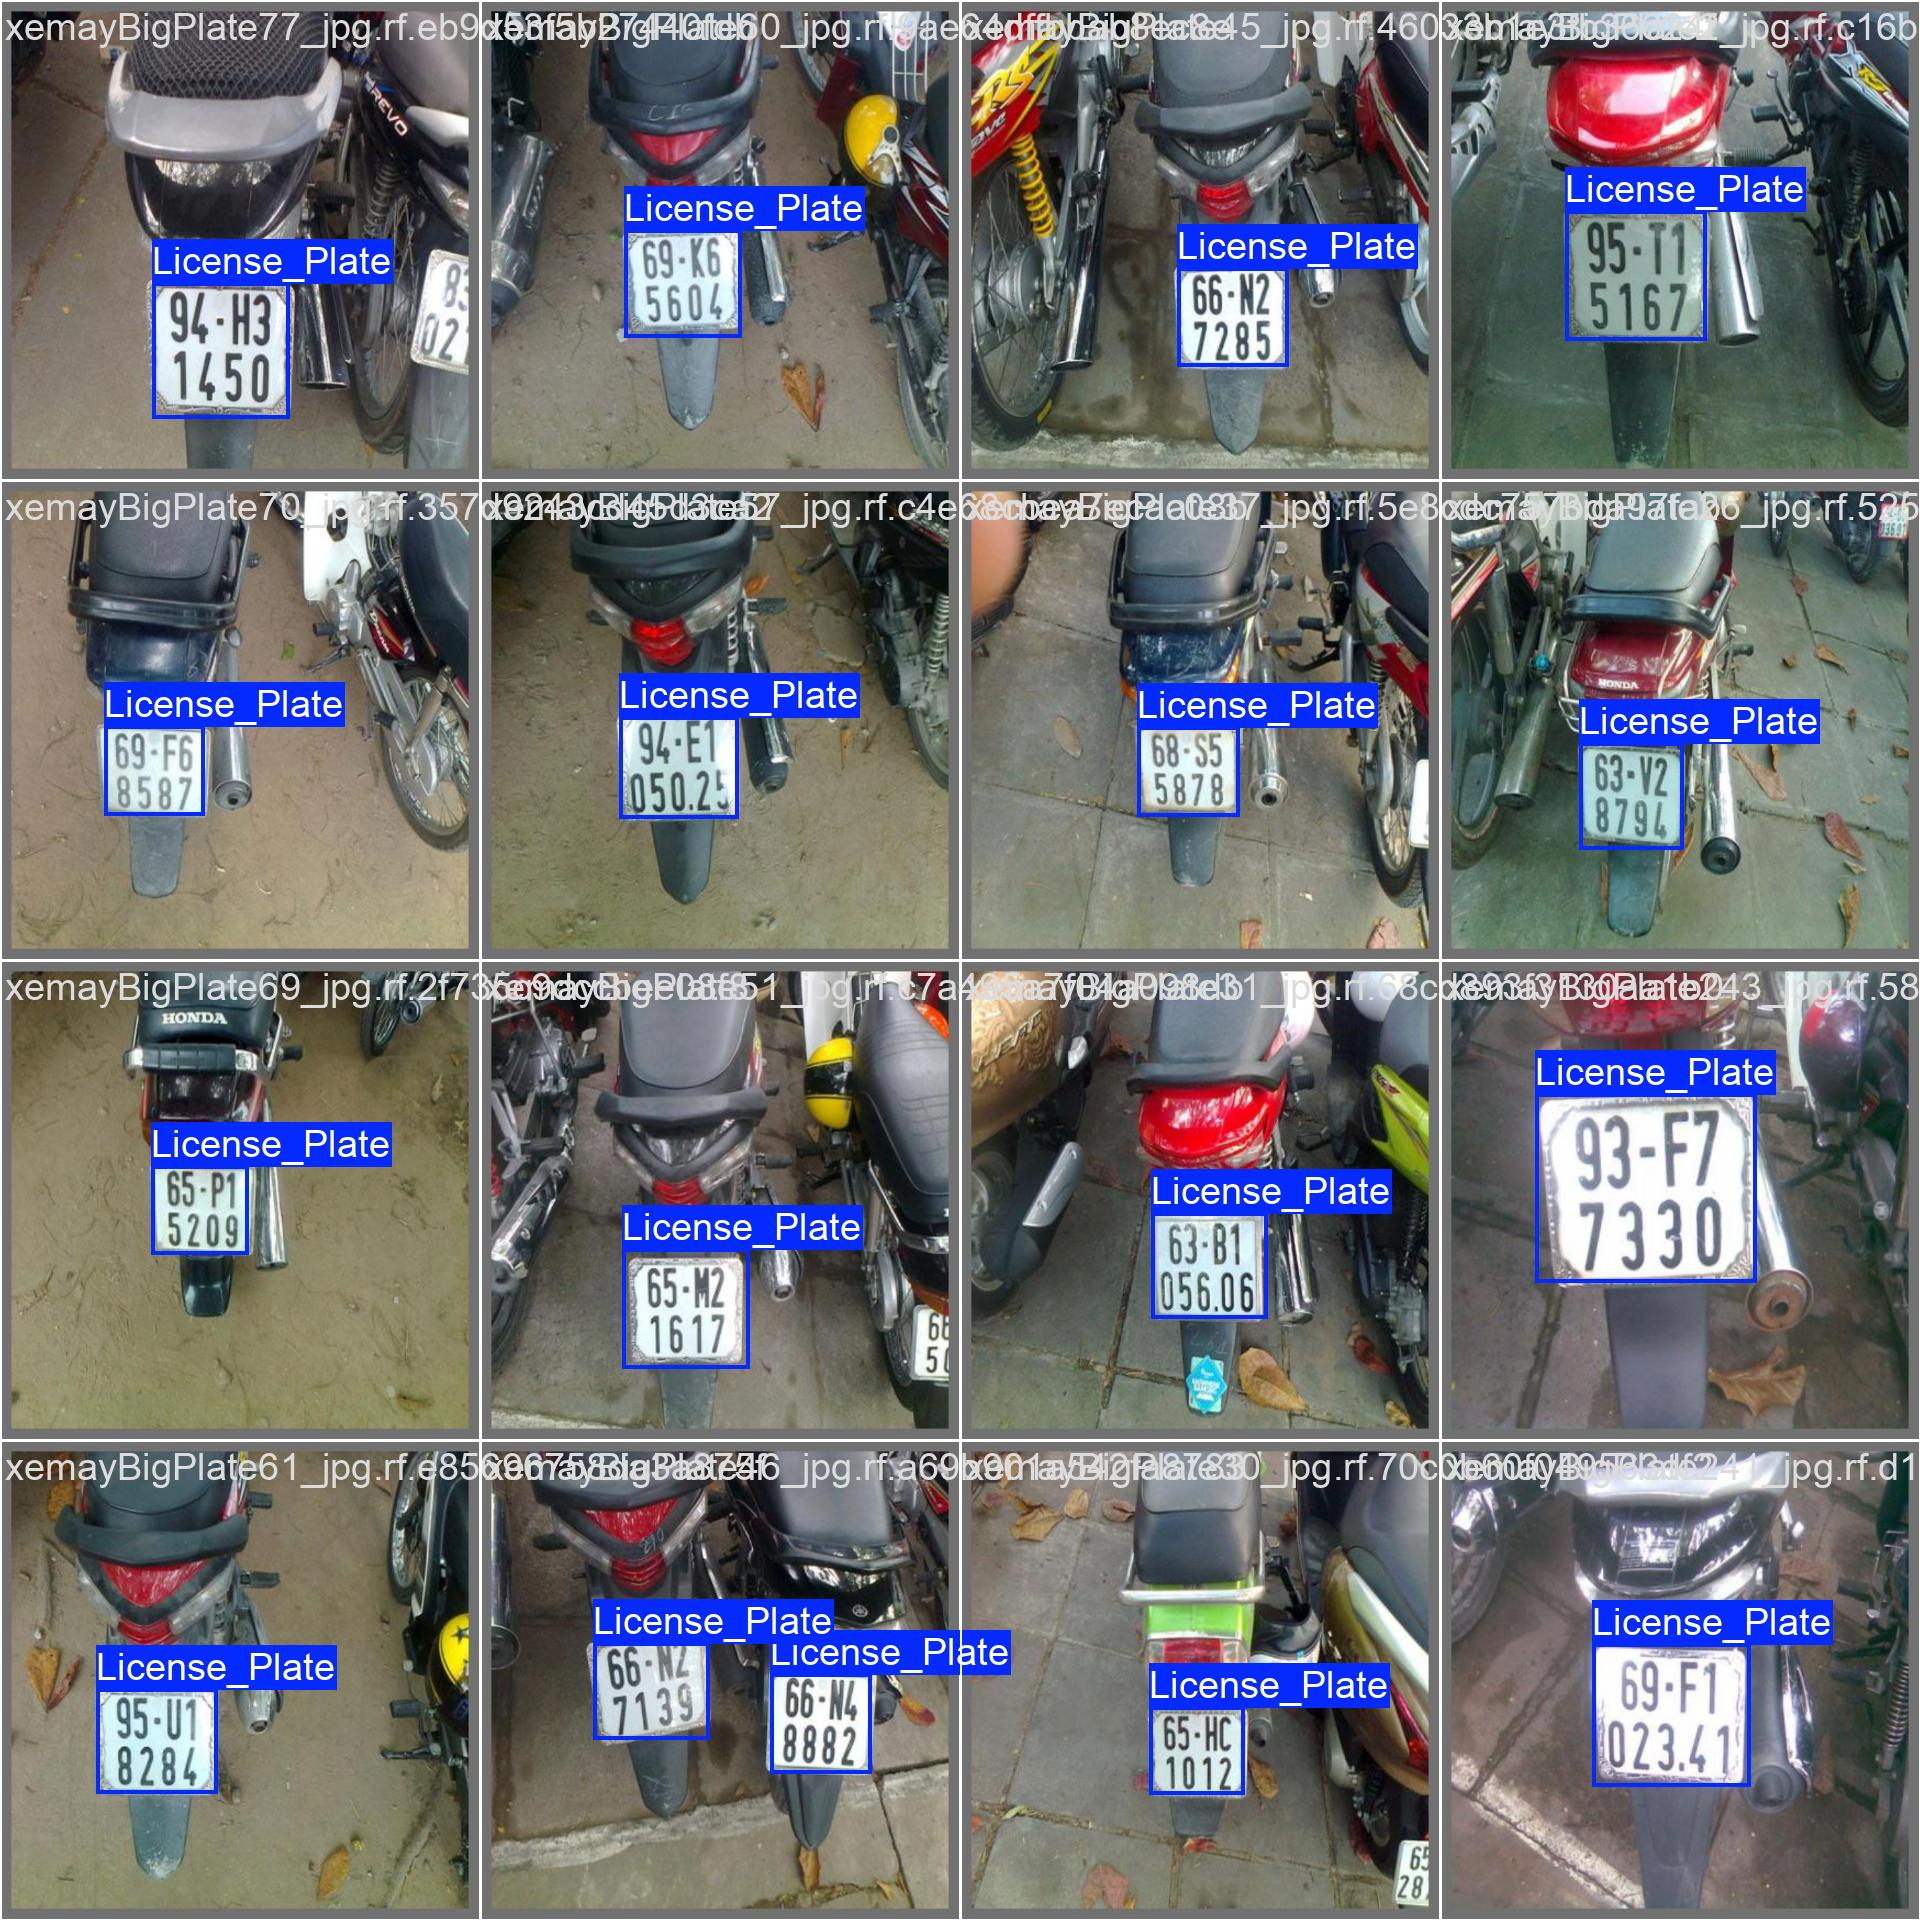

In [6]:
Image(filename=f'{log_dir}/{training_name}/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


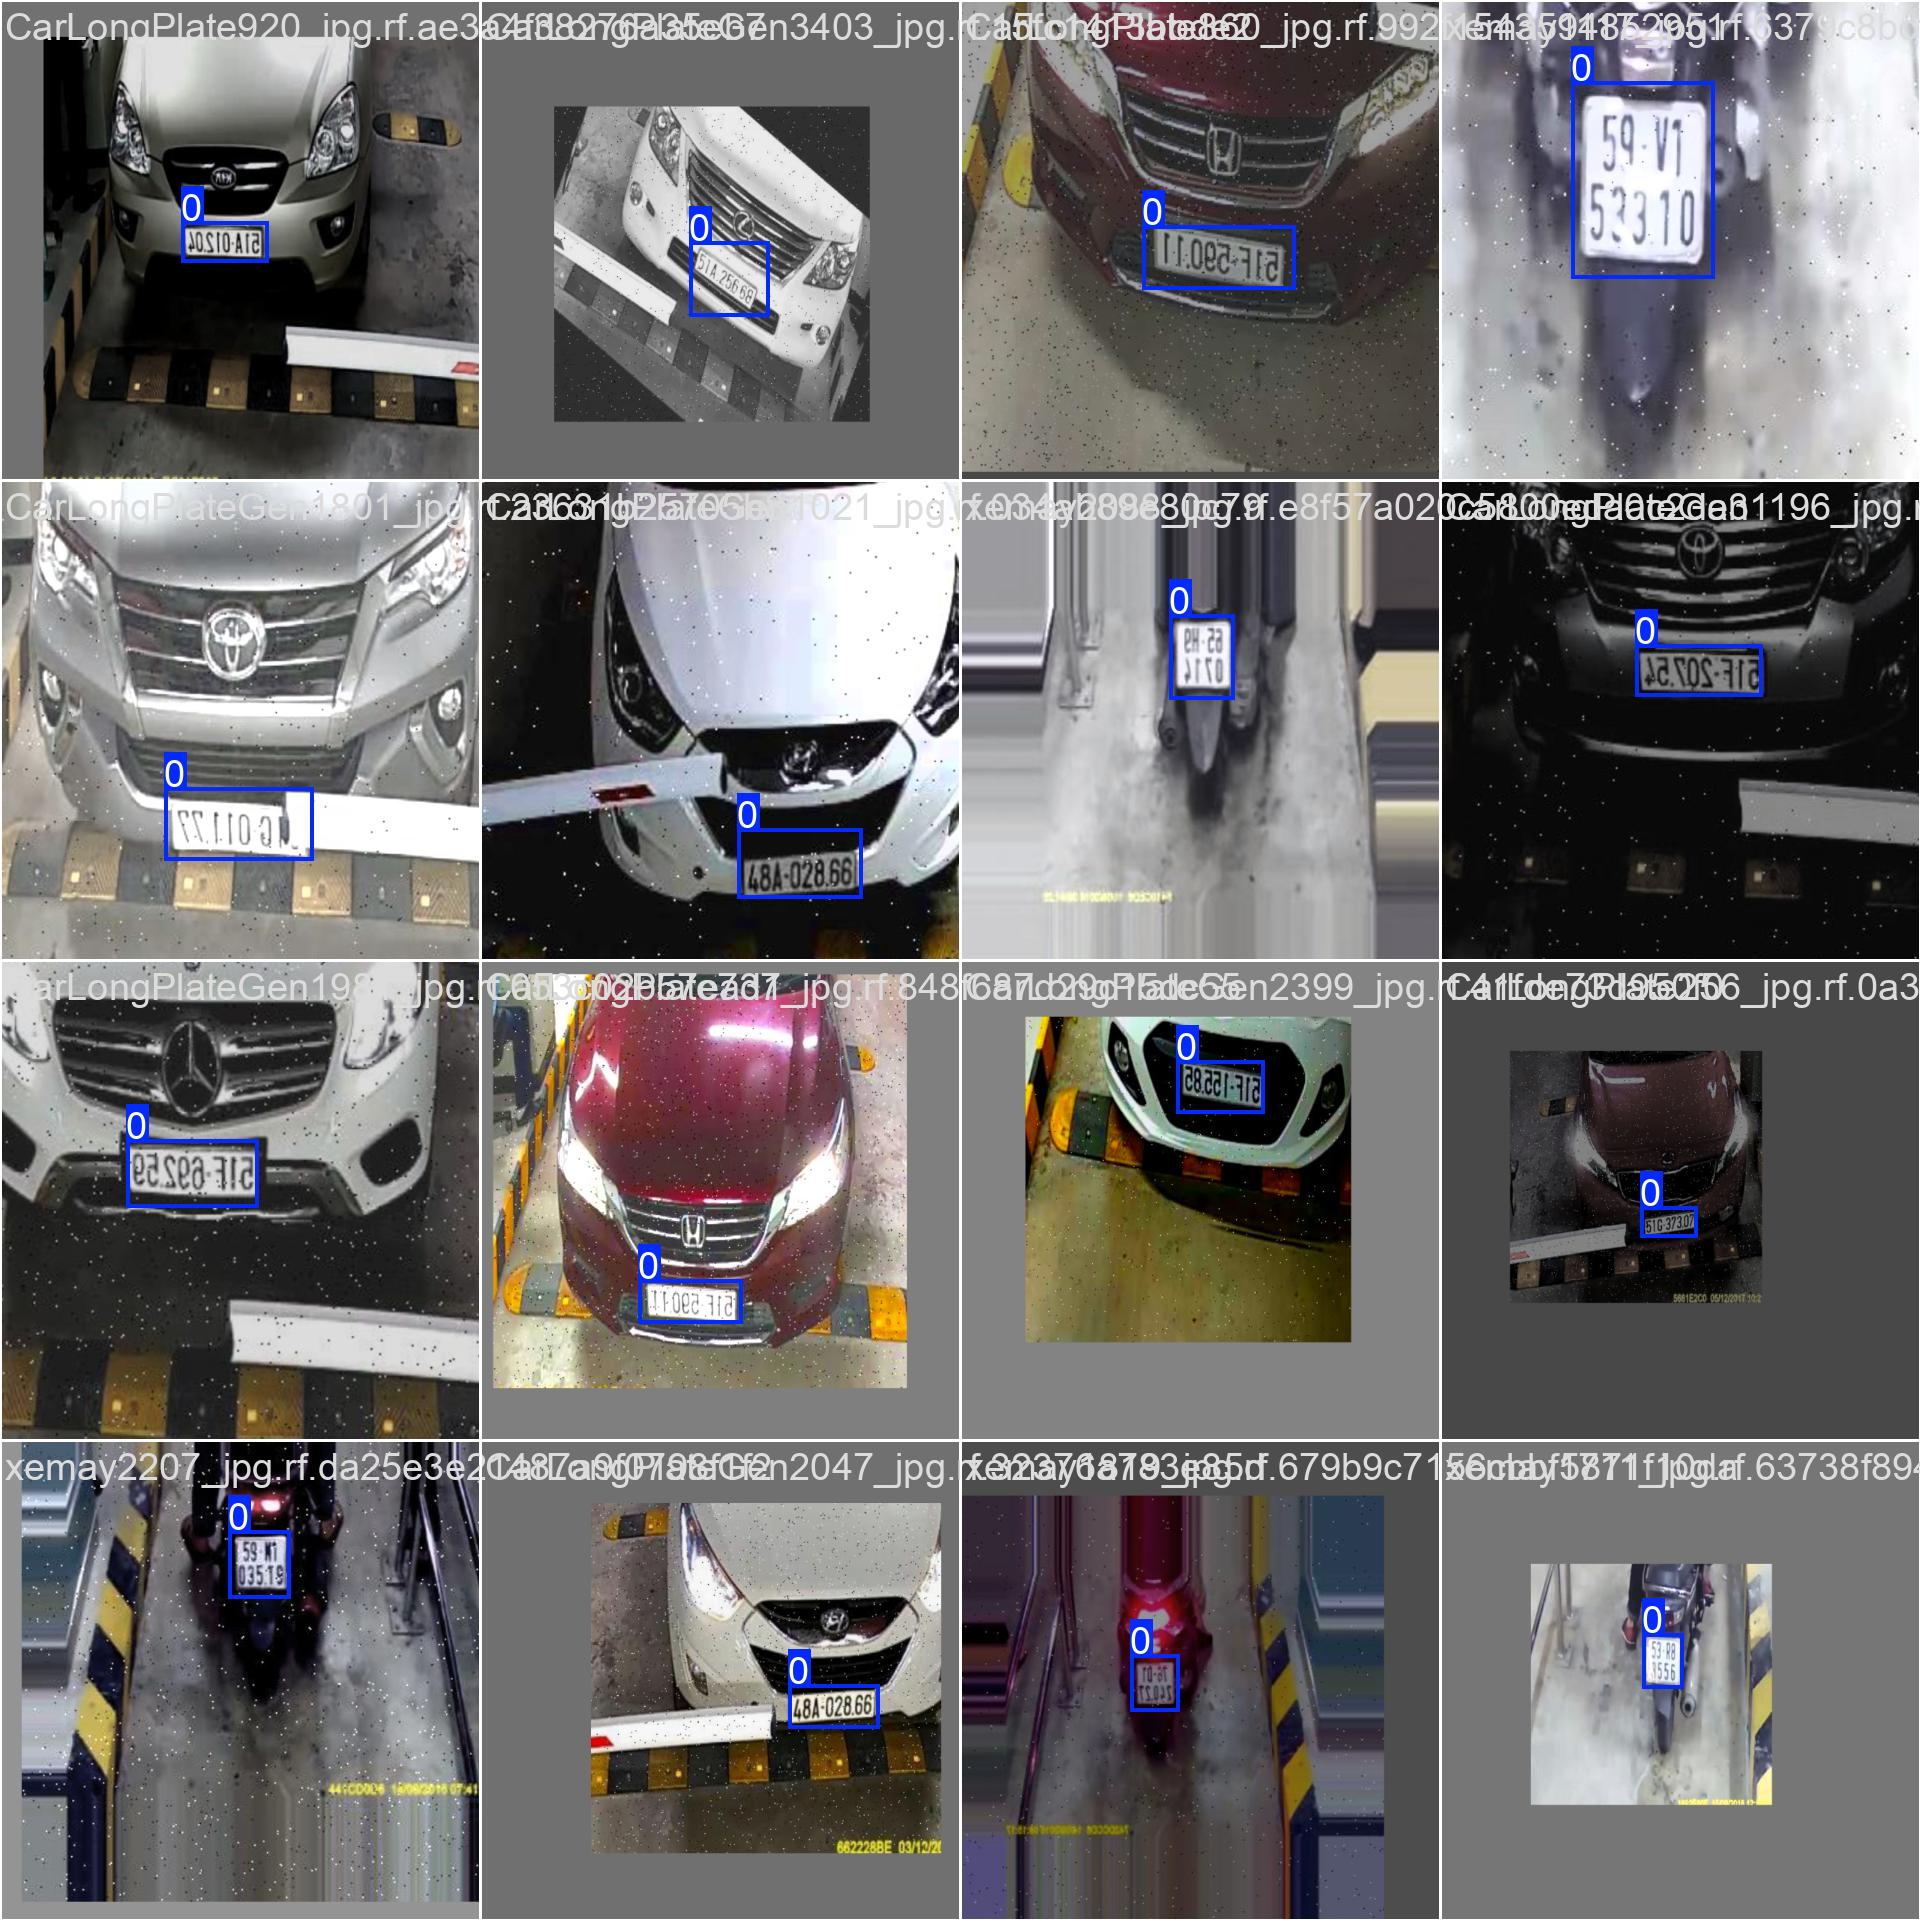

In [7]:
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename=f'{log_dir}/{training_name}/train_batch0.jpg', width=900)

## 4. Performing Inference on Test Images

We load the best weights from the trained model.

We create directories to save the detection results and cropped images.

We iterate over the test images, perform object detection, and save the results.

In [ ]:
model = YOLO(f'{log_dir}/{training_name}/weights/best.pt')

# Specify the directory containing images to detect objects on
images_dir = f'{dataset_location}/test/images'  # replace with the path to your dataset
output_log_dir = f'{dataset_location}/detection_results/labels'  # directory to save detection info
output_img_dir = f'{dataset_location}/detection_results'
cropped_plates_path = f'{dataset_location}/cropped_plates'

Path(output_log_dir).mkdir(parents=True, exist_ok=True)
Path(output_img_dir).mkdir(parents=True, exist_ok=True)
Path(cropped_plates_path).mkdir(parents=True, exist_ok=True)

# Run inference and save details
for image_path in Path(images_dir).glob("*.jpg"):  # replace with the appropriate extension if different
    # Perform detection
    results = model(image_path)
    
    # Prepare to save results
    detections = []
    # Process results list
    # for result in results:
    #     boxes = result.boxes  # Boxes object for bounding box outputs
    #     masks = result.masks  # Masks object for segmentation masks outputs
    #     keypoints = result.keypoints  # Keypoints object for pose outputs
    #     probs = result.probs  # Probs object for classification outputs
    #     obb = result.obb  # Oriented boxes object for OBB outputs
    #     result.show()  # display to screen
    #     result.save(filename="result.jpg")  # save to disk
    max_conf = -1.0
    for det in results[0].boxes.data:  # detections for the image
        conf = float(det[4])
        if conf < max_conf:
            continue
        x1, y1, x2, y2, conf, cls = map(float, det[:6])
        # class_name = model.names[int(cls)]
        detections.append({
            "x1": x1,
            "y1": y1,
            "x2": x2,
            "y2": y2,
            "confidence": conf,
            "class": int(cls)
        })

    img = cv2.imread(image_path)
    cropped_plate = img[int(y1):int(y2), int(x1):int(x2)]
    plate_save_path = os.path.join(cropped_plates_path, f'plate_{image_path.stem}.jpg')
    cv2.imwrite(plate_save_path, cropped_plate)

    results[0].save(filename=f'{output_img_dir}/{image_path.stem}.jpg')
    
    # Save detections to a JSON file
    output_file = Path(output_log_dir) / f"{image_path.stem}_detections.json"
    with open(output_file, 'w') as f:
        json.dump(detections, f, indent=4)



image 1/1 /home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/test/images/xemayBigPlate29_jpg.rf.9e5cd3a5b39230305d00f718464e92ef.jpg: 640x640 1 License_Plate, 7.0ms
Speed: 4.0ms preprocess, 7.0ms inference, 111.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/test/images/xemayBigPlate137_jpg.rf.a1c6d20f41859fcd7d5ae61987b24f80.jpg: 640x640 1 License_Plate, 9.1ms
Speed: 2.3ms preprocess, 9.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/test/images/CarLongPlateGen944_jpg.rf.af49e422f92a7bb992158e1989f2a28b.jpg: 640x640 1 License_Plate, 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/test/images/xemay2204_

## Conclusion
This notebook demonstrates a complete workflow for training a YOLO object detection model using a custom dataset and performing inference on new images. The results, including bounding boxes and cropped images, are saved for further analysis.



In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

# Part 2: More epochs!

In [2]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
!nvidia-smi

Sun Nov 24 01:09:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.07             Driver Version: 535.161.07   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100 80GB PCIe          Off | 00000000:22:00.0 Off |                    0 |
| N/A   37C    P0              69W / 300W |  79492MiB / 81920MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [4]:
from ultralytics import YOLO
import os
import yaml
from IPython.display import Image
import json
import cv2
from pathlib import Path

## 1. Setting Up the Dataset

project_dir = os.path.dirname(os.getcwd())
dataset_location = os.path.join(project_dir, 'data', 'roboflow_dataset_yolo_v11')
data_yaml_location = os.path.join(dataset_location, 'data.yaml')

with open(data_yaml_location, 'r') as file:
    data = yaml.safe_load(file)

data['train'] = f'{dataset_location}/train/images'
data['val'] = f'{dataset_location}/valid/images'
data['test'] = f'{dataset_location}/test/images'

with open(data_yaml_location, 'w') as file:
    yaml.dump(data, file)

## 2. Training the YOLO Model

# Load a pretrained YOLO detection model
model = YOLO('yolo11s.pt')
training_name = 'experiment_35_epochs'

# Set the logging directory
log_dir = f'{dataset_location}/logs'  # specify your directory here

# Train the model and log results to the specified directory
model.train(
    data=data_yaml_location,
    epochs=35,  # Update the number of epochs
    project=log_dir,  # directory to save results
    name=training_name,  # subdirectory for this specific run
    device=device  # Specify CUDA device 2
)

New https://pypi.org/project/ultralytics/8.3.36 available 😃 Update with 'pip install -U ultralytics'
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/data.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/logs, name=experiment_35_epochs2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_

E0000 00:00:1732399769.560290  452737 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732399769.564728  452737 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/train/labels.cache... 18528 images, 18 backgrounds, 0 corrupt: 100%|██████████| 18528/18528 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/valid/labels.cache... 1765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1765/1765 [00:00<?, ?it/s]


Plotting labels to /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/logs/experiment_35_epochs2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2024/11/24 01:09:39 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of keras. If you encounter errors during autologging, try upgrading / downgrading keras to a supported version, or try upgrading MLflow.
2024/11/24 01:09:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/11/24 01:09:40 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.
2024/11/24 01:09:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(21ecf6246b6a46fc847bb0d1df47cd90) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/logs/experiment_35_epochs2
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35       4.3G       1.21      1.002      1.151         32        640: 100%|██████████| 1158/1158 [01:48<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 10.52it/s]

                   all       1765       1840      0.982      0.952      0.974      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      4.28G      1.191     0.6378      1.134         26        640: 100%|██████████| 1158/1158 [01:37<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 11.02it/s]

                   all       1765       1840      0.966      0.938      0.968      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      4.26G      1.215     0.6869      1.164         18        640: 100%|██████████| 1158/1158 [01:34<00:00, 12.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 10.95it/s]

                   all       1765       1840       0.96      0.896      0.944       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      4.27G      1.229     0.6926      1.187         22        640: 100%|██████████| 1158/1158 [01:36<00:00, 11.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 10.96it/s]

                   all       1765       1840      0.981       0.94      0.969       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      4.27G      1.192     0.6418       1.17         25        640: 100%|██████████| 1158/1158 [01:35<00:00, 12.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:06<00:00,  8.50it/s]

                   all       1765       1840      0.978      0.939      0.972      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      4.27G      1.172     0.6031      1.155         28        640: 100%|██████████| 1158/1158 [01:35<00:00, 12.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 10.98it/s]

                   all       1765       1840      0.977      0.941      0.968      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      4.27G      1.147     0.5801      1.143         24        640: 100%|██████████| 1158/1158 [01:37<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 10.97it/s]

                   all       1765       1840      0.985      0.946      0.975      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      4.27G      1.137     0.5667      1.137         16        640: 100%|██████████| 1158/1158 [01:35<00:00, 12.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 11.01it/s]

                   all       1765       1840      0.983      0.948      0.977      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      4.27G      1.128     0.5487      1.137         25        640: 100%|██████████| 1158/1158 [01:37<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 11.14it/s]

                   all       1765       1840      0.978      0.949      0.979      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      4.27G      1.108     0.5312      1.121         26        640: 100%|██████████| 1158/1158 [01:49<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:17<00:00,  3.22it/s]

                   all       1765       1840      0.988       0.95      0.977      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      4.27G      1.104     0.5241      1.119         20        640: 100%|██████████| 1158/1158 [03:01<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]

                   all       1765       1840      0.988      0.954      0.979      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      4.27G      1.087     0.5101      1.116         22        640: 100%|██████████| 1158/1158 [03:01<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:16<00:00,  3.32it/s]

                   all       1765       1840      0.982      0.956      0.981      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      4.27G      1.086     0.4999      1.109         25        640: 100%|██████████| 1158/1158 [03:04<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:15<00:00,  3.59it/s]

                   all       1765       1840      0.984      0.964      0.982      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      4.27G      1.086     0.4962      1.107         27        640: 100%|██████████| 1158/1158 [03:06<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:15<00:00,  3.71it/s]

                   all       1765       1840       0.98      0.958      0.981        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      4.27G      1.079     0.4897      1.104         18        640: 100%|██████████| 1158/1158 [03:07<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:14<00:00,  3.83it/s]

                   all       1765       1840      0.988       0.96      0.982      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      4.29G      1.067     0.4806      1.095         21        640: 100%|██████████| 1158/1158 [03:07<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]

                   all       1765       1840      0.988      0.966      0.985      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      4.27G      1.057     0.4687      1.089         23        640: 100%|██████████| 1158/1158 [03:07<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:14<00:00,  3.86it/s]

                   all       1765       1840      0.989      0.964      0.985      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      4.27G      1.054     0.4677      1.091         27        640: 100%|██████████| 1158/1158 [03:07<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:14<00:00,  3.90it/s]

                   all       1765       1840       0.98      0.968      0.985      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      4.27G      1.047     0.4606       1.09         36        640: 100%|██████████| 1158/1158 [03:09<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:14<00:00,  3.95it/s]

                   all       1765       1840      0.987      0.965      0.985      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      4.27G      1.042     0.4575      1.087         33        640: 100%|██████████| 1158/1158 [03:09<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:12<00:00,  4.60it/s]

                   all       1765       1840      0.982      0.967      0.984      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      4.27G      1.037     0.4521      1.082         20        640: 100%|██████████| 1158/1158 [01:45<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00,  9.54it/s]


                   all       1765       1840      0.989      0.965      0.985      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      4.27G      1.032     0.4434      1.078         26        640: 100%|██████████| 1158/1158 [01:38<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 11.07it/s]

                   all       1765       1840      0.983       0.97      0.985       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      4.27G      1.022      0.437      1.074         22        640: 100%|██████████| 1158/1158 [01:39<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 11.20it/s]

                   all       1765       1840      0.983       0.97      0.985      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      4.27G      1.016     0.4304      1.072         29        640: 100%|██████████| 1158/1158 [01:37<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:06<00:00,  8.09it/s]

                   all       1765       1840      0.988      0.963      0.985      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      4.27G      1.007     0.4256      1.064         27        640: 100%|██████████| 1158/1158 [01:36<00:00, 11.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 11.18it/s]

                   all       1765       1840      0.984      0.972      0.988      0.724


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      4.27G     0.9987     0.3889      1.098         17        640: 100%|██████████| 1158/1158 [01:39<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 10.91it/s]

                   all       1765       1840      0.986      0.968      0.987      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      4.27G     0.9874     0.3813      1.097         15        640: 100%|██████████| 1158/1158 [01:33<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 10.07it/s]

                   all       1765       1840      0.983      0.973      0.989      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35      4.27G     0.9711     0.3707      1.086         17        640: 100%|██████████| 1158/1158 [01:32<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 10.74it/s]

                   all       1765       1840      0.988      0.971      0.986      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      4.27G     0.9598      0.363      1.083         15        640: 100%|██████████| 1158/1158 [01:33<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 10.55it/s]


                   all       1765       1840      0.986       0.97      0.987      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35      4.27G     0.9545      0.359      1.079         16        640: 100%|██████████| 1158/1158 [01:32<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:04<00:00, 11.51it/s]

                   all       1765       1840       0.99      0.968      0.988      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      4.27G      0.944     0.3515      1.073         16        640: 100%|██████████| 1158/1158 [01:33<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:04<00:00, 11.59it/s]


                   all       1765       1840      0.989      0.968      0.987       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      4.27G     0.9338     0.3436      1.068         16        640: 100%|██████████| 1158/1158 [01:34<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 10.61it/s]

                   all       1765       1840       0.99      0.971      0.989       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      4.27G     0.9197     0.3363       1.06         20        640: 100%|██████████| 1158/1158 [01:34<00:00, 12.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 10.75it/s]

                   all       1765       1840      0.988      0.971       0.99      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      4.27G     0.9144     0.3304      1.059         16        640: 100%|██████████| 1158/1158 [01:33<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 10.00it/s]

                   all       1765       1840      0.987      0.971      0.989       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      4.27G     0.8993     0.3242      1.051         15        640: 100%|██████████| 1158/1158 [01:33<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:05<00:00, 10.92it/s]


                   all       1765       1840      0.984      0.973      0.988      0.728

35 epochs completed in 1.283 hours.
Optimizer stripped from /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/logs/experiment_35_epochs2/weights/last.pt, 19.2MB
Optimizer stripped from /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/logs/experiment_35_epochs2/weights/best.pt, 19.2MB

Validating /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/logs/experiment_35_epochs2/weights/best.pt...
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100 80GB PCIe, 81051MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 56/56 [00:19<00:00,  2.89it/s]


                   all       1765       1840      0.987      0.971      0.989       0.73
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/logs/experiment_35_epochs2
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f0a2c717610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
## 3. Viewing Training Results

Image(filename=f'{log_dir}/{training_name}/results.png', width=1000)  # view results.png
Image(filename=f'{log_dir}/{training_name}/val_batch0_labels.jpg', width=900)
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename=f'{log_dir}/{training_name}/train_batch0.jpg', width=900)

## 4. Performing Inference on Test Images

model = YOLO(f'{log_dir}/{training_name}/weights/best.pt')

# Specify the directory containing images to detect objects on
images_dir = f'{dataset_location}/test/images'  # replace with the path to your dataset
output_log_dir = f'{dataset_location}/detection_results/labels'  # directory to save detection info
output_img_dir = f'{dataset_location}/detection_results'
cropped_plates_path = f'{dataset_location}/cropped_plates'

Path(output_log_dir).mkdir(parents=True, exist_ok=True)
Path(output_img_dir).mkdir(parents=True, exist_ok=True)
Path(cropped_plates_path).mkdir(parents=True, exist_ok=True)

# Run inference and save details
for image_path in Path(images_dir).glob("*.jpg"):  # replace with the appropriate extension if different
    # Perform detection
    results = model(image_path)
    
    # Prepare to save results
    detections = []
    max_conf = -1.0
    for det in results[0].boxes.data:  # detections for the image
        conf = float(det[4])
        if conf < max_conf:
            continue
        x1, y1, x2, y2, conf, cls = map(float, det[:6])
        detections.append({
            "x1": x1,
            "y1": y1,
            "x2": x2,
            "y2": y2,
            "confidence": conf,
            "class": int(cls)
        })

    img = cv2.imread(str(image_path))
    cropped_plate = img[int(y1):int(y2), int(x1):int(x2)]
    plate_save_path = os.path.join(cropped_plates_path, f'plate_{image_path.stem}.jpg')
    cv2.imwrite(plate_save_path, cropped_plate)

    results[0].save(filename=f'{output_img_dir}/{image_path.stem}.jpg')
    
    # Save detections to a JSON file
    output_file = Path(output_log_dir) / f"{image_path.stem}_detections.json"
    with open(output_file, 'w') as f:
        json.dump(detections, f, indent=4)

## Conclusion

GROUND TRUTH AUGMENTED TRAINING DATA:

image 1/1 /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/test/images/CarLongPlateGen2735_jpg.rf.2f0e6aa83ac5c6da4ef3bf579552a94a.jpg: 640x640 1 License_Plate, 6.6ms
Speed: 4.3ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/test/images/Cars351_png_jpg.rf.99a6938f7696b7260a0acf61b4a84d41.jpg: 640x640 1 License_Plate, 6.6ms
Speed: 1.1ms preprocess, 6.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v11/test/images/xemay207_jpg.rf.bfecbe463f88e11567bf3e93e38cd9ce.jpg: 640x640 1 License_Plate, 6.9ms
Speed: 1.1ms preprocess, 6.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/elisey/cv/Real-time_Number_Plate_Recognition/data/roboflow_dataset_yolo_v

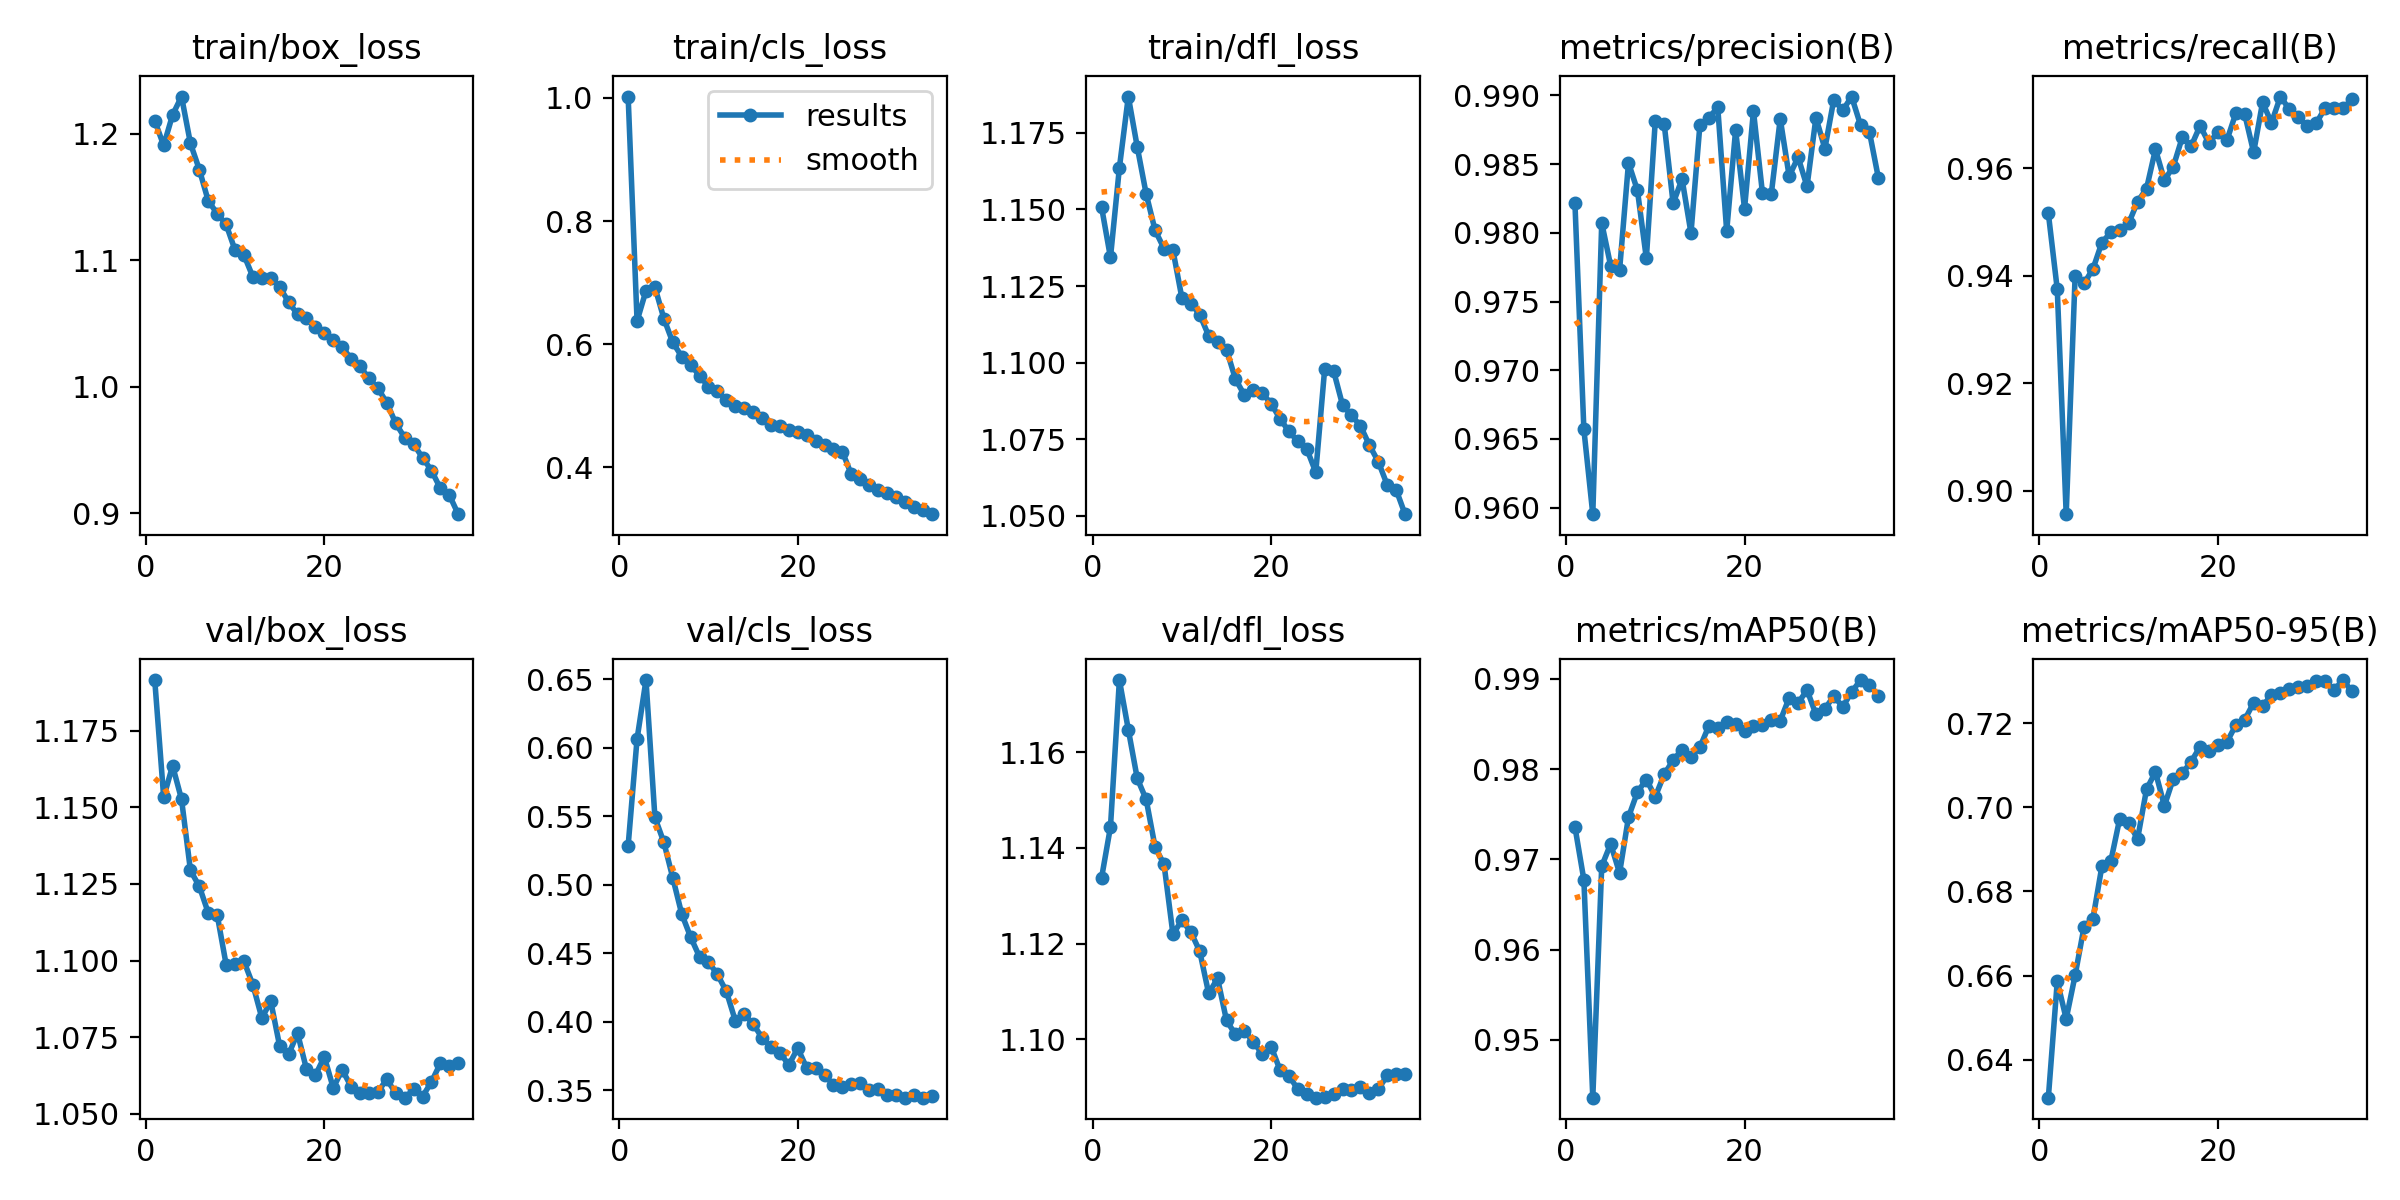

In [7]:
Image(filename=f'{log_dir}/{training_name}/results.png', width=1000)  # view results.png]

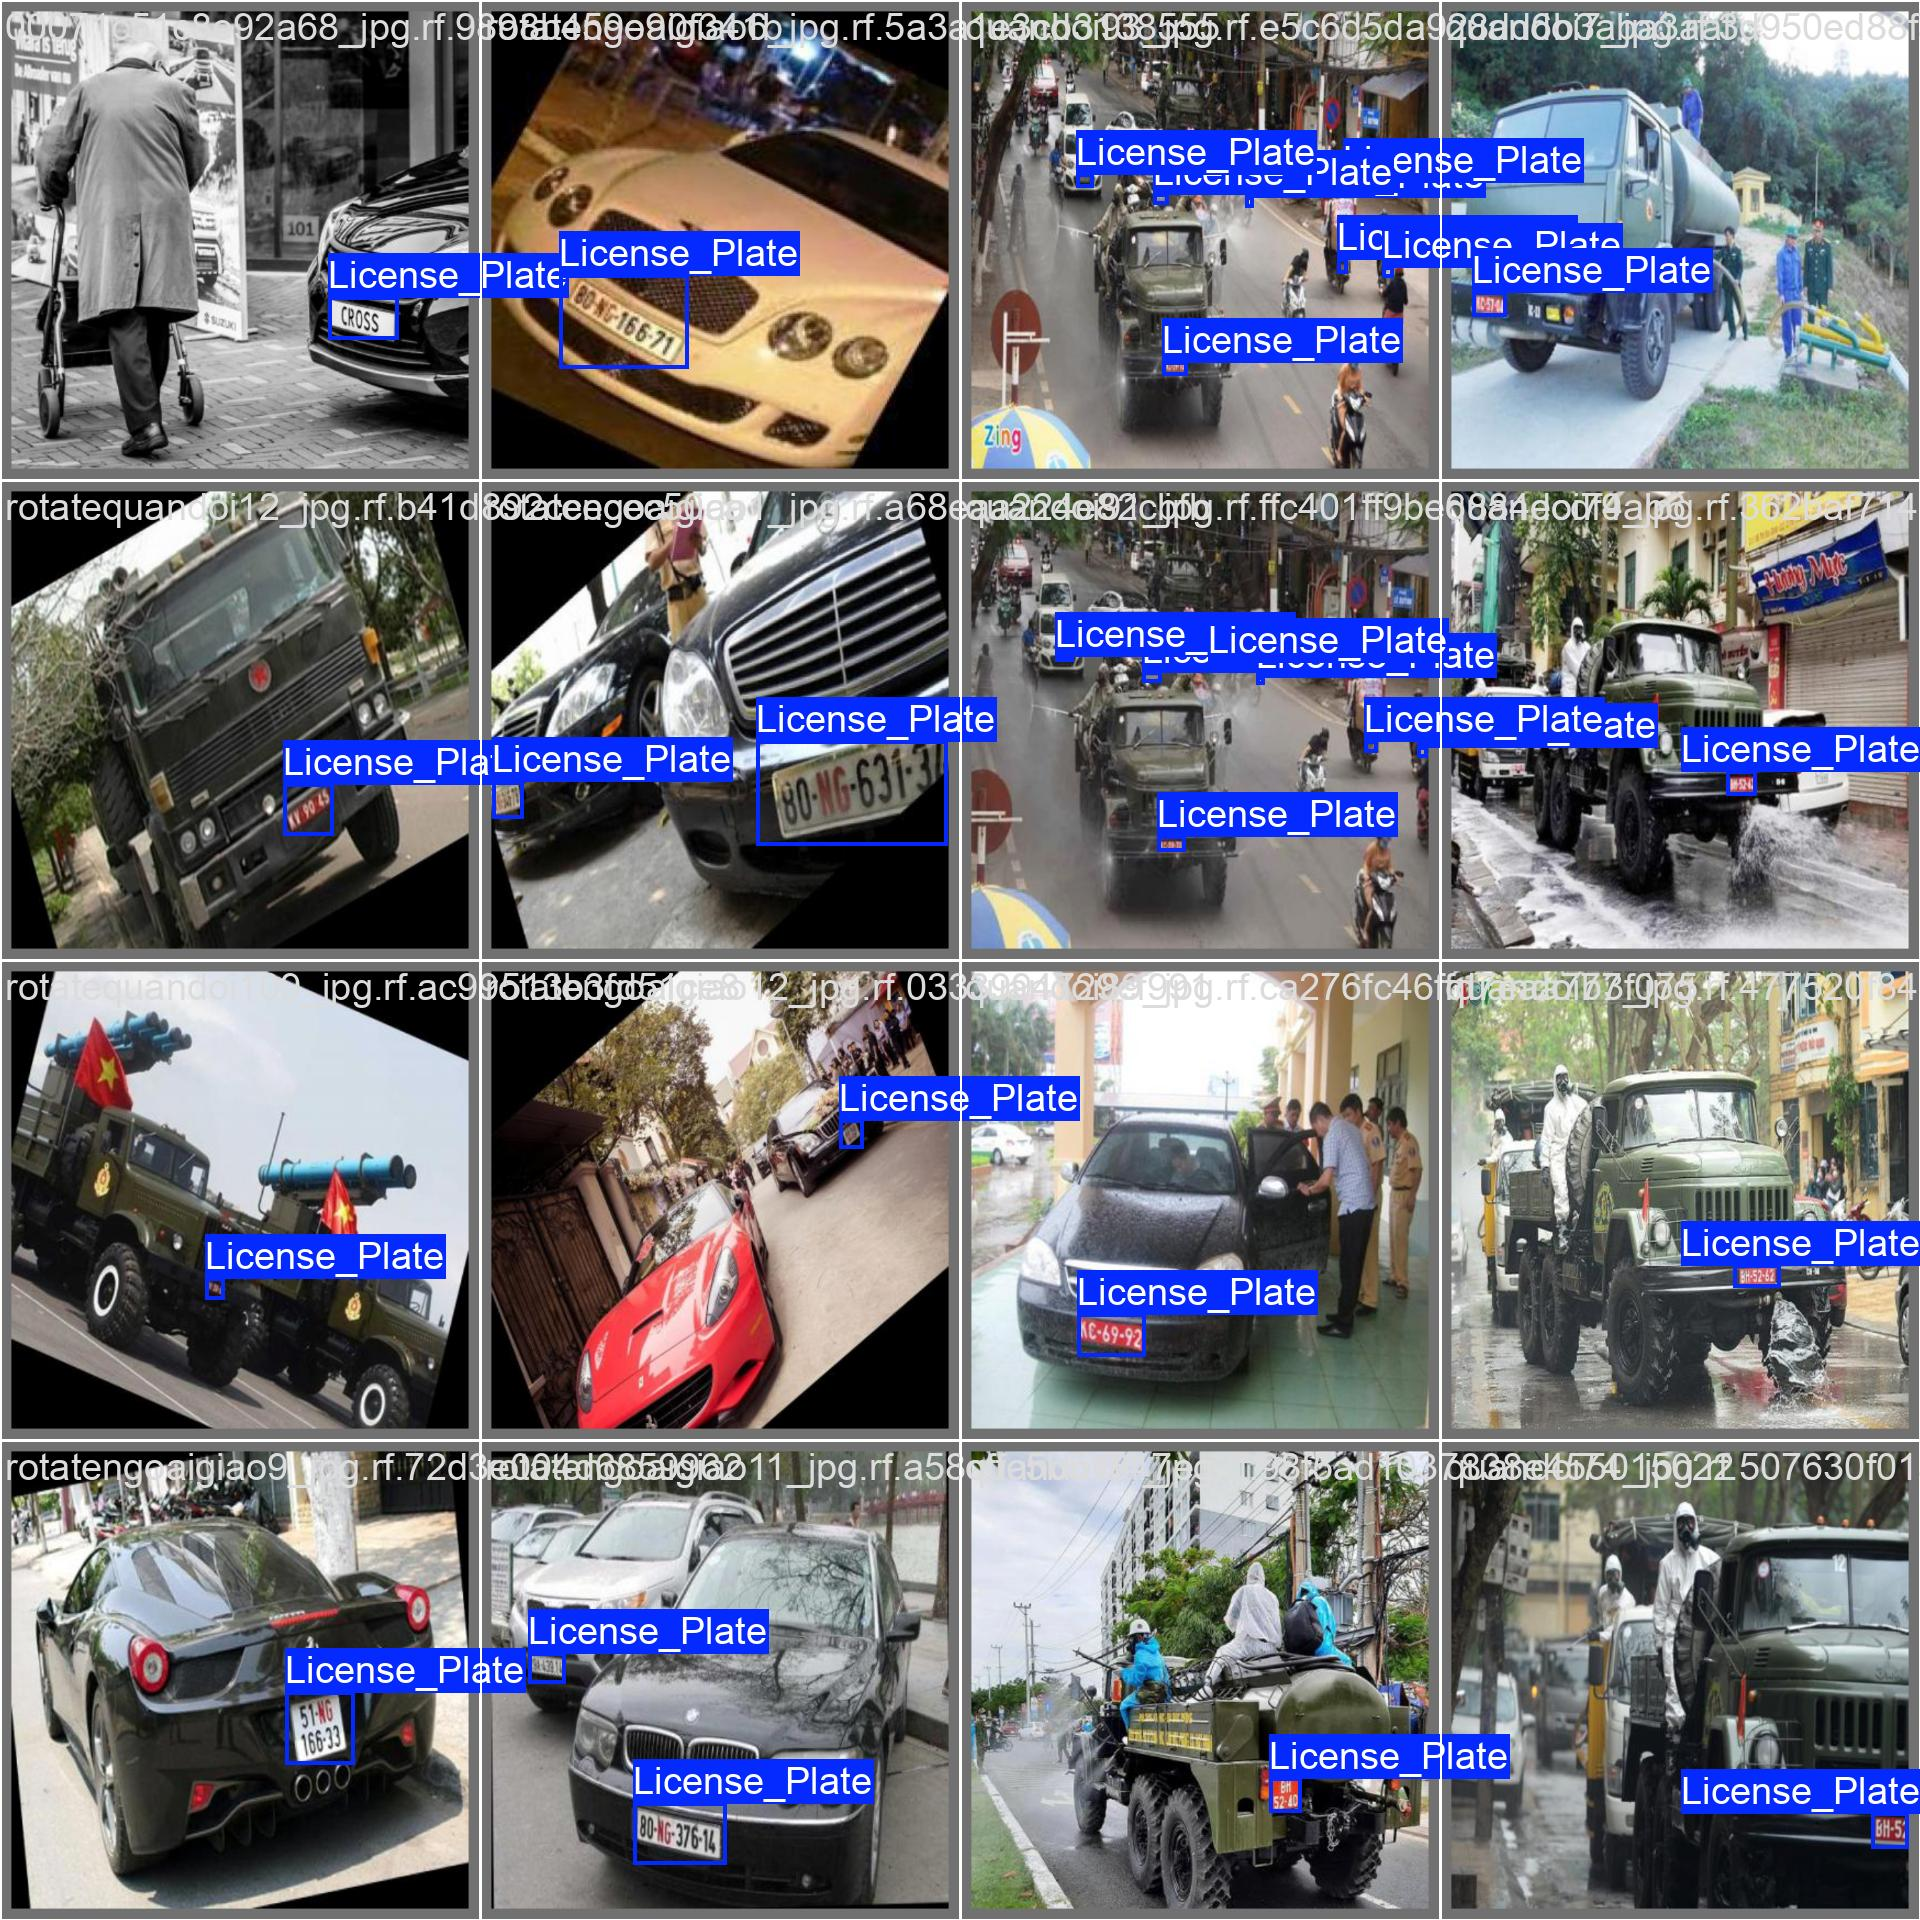

In [8]:
Image(filename=f'{log_dir}/{training_name}/val_batch0_labels.jpg', width=900)